-------------------------------------------------------
Dataset: OR3         Method: baseline
-------------------------------------------------------
Ratio of Prune (baseline): 0.0
Elapsed Time: 1294.9280529022217
Highest Score: -212.75


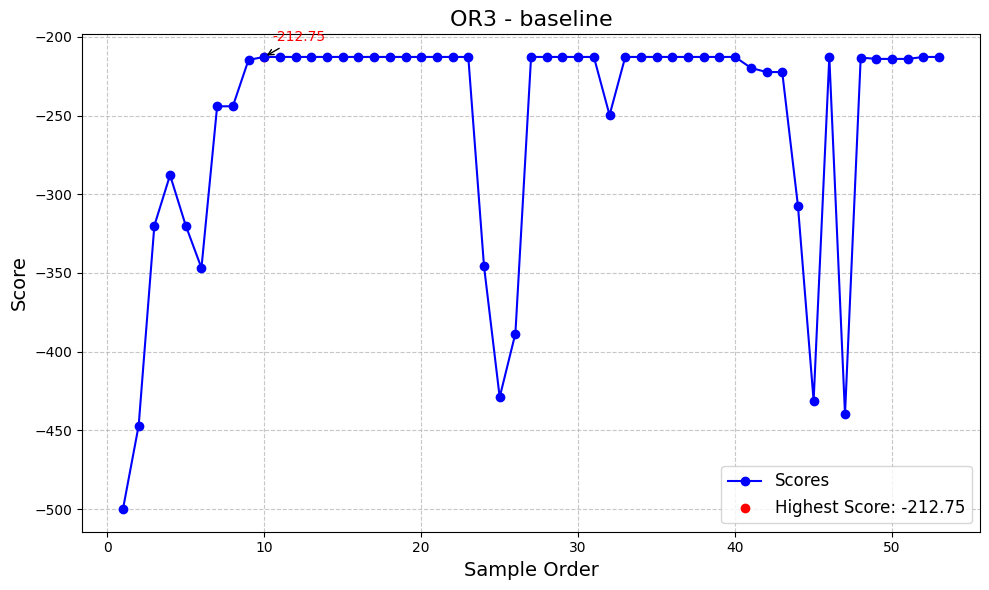

-------------------------------------------------------
Dataset: OR3         Method: similarity
-------------------------------------------------------
Ratio of Prune (similarity): 0.5283018867924528
Elapsed Time: 1009.0990052223206
Highest Score: -212.7


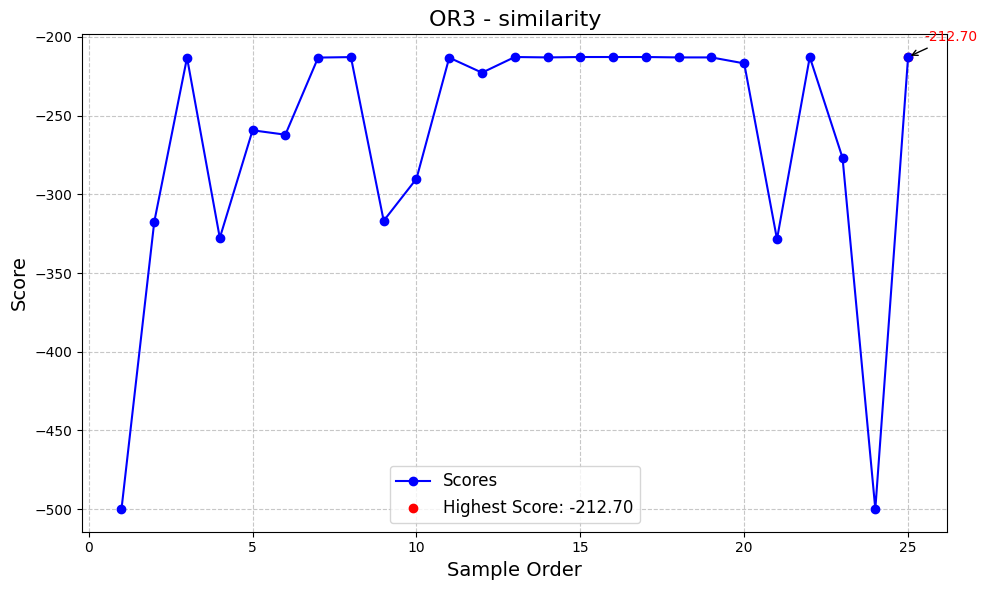

-------------------------------------------------------
Dataset: OR3         Method: hash
-------------------------------------------------------
Ratio of Prune (hash): 0.0
Elapsed Time: 1227.2051558494568
Highest Score: -212.75


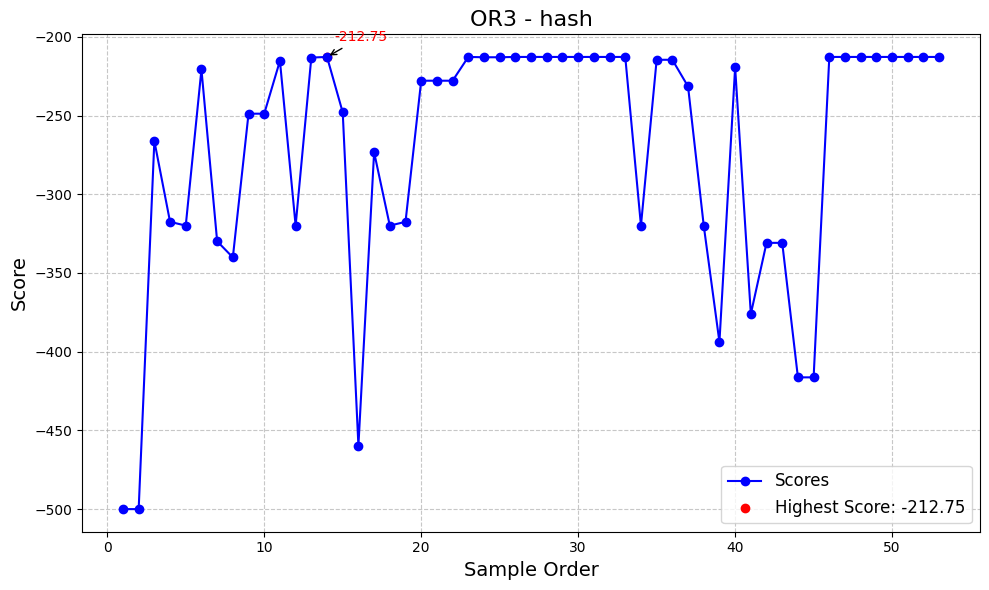

-------------------------------------------------------
Dataset: Weibull_5k         Method: baseline
-------------------------------------------------------
Ratio of Prune (baseline): 0.0
Elapsed Time: 1412.0184512138367
Highest Score: -2071.8


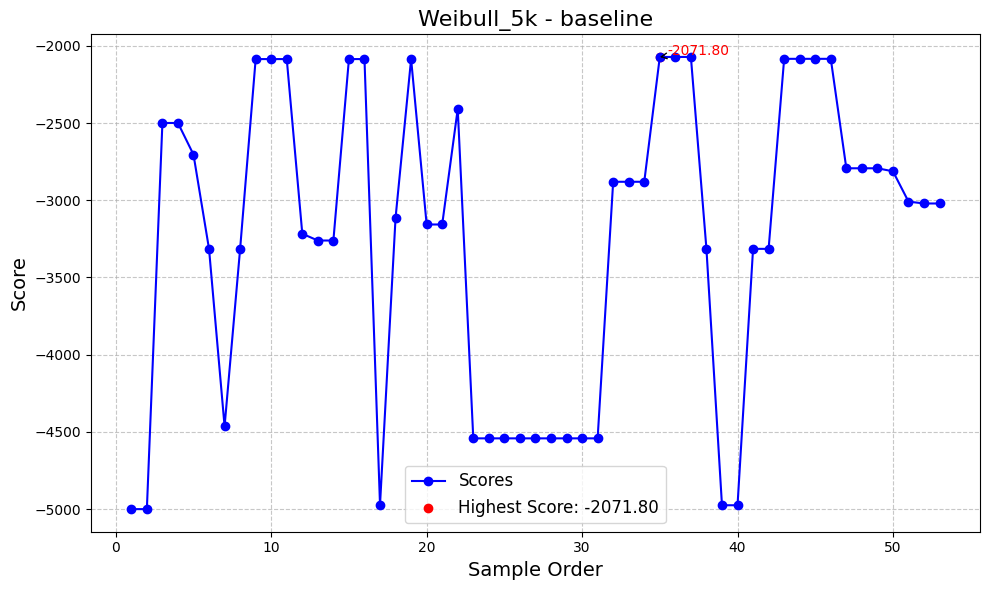

-------------------------------------------------------
Dataset: Weibull_5k         Method: similarity
-------------------------------------------------------
Ratio of Prune (similarity): 0.5849056603773585
Elapsed Time: 995.4519219398499
Highest Score: -2071.8


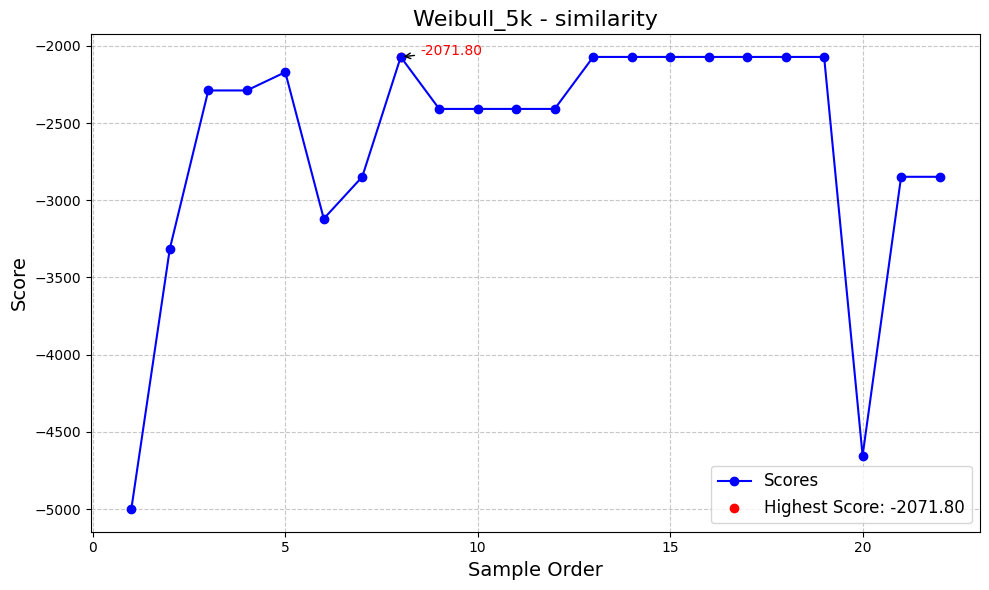

-------------------------------------------------------
Dataset: Weibull_5k         Method: hash
-------------------------------------------------------
Ratio of Prune (hash): 0.03773584905660377
Elapsed Time: 1377.1139509677887
Highest Score: -2071.8


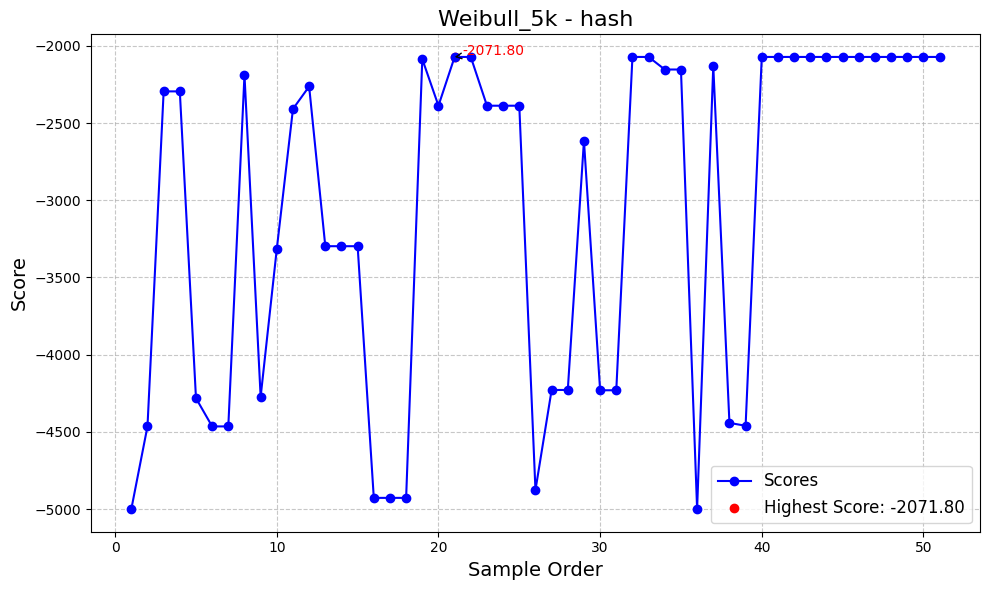

In [46]:
import os
import json
import numpy as np
import matplotlib.pyplot as plt


results =[]

def save_results(dataset_name, method, prune_ratio, elapsed_time, highest_score):
    """Save the results for each dataset-method combination."""
    results.append({
        "dataset": dataset_name,
        "method": method,
        "prune_ratio": prune_ratio,
        "elapsed_time": elapsed_time,
        "highest_score": highest_score
    })

def plot_comparison_histogram(results, metric, title, ylabel):
    """Plot comparison histogram for a given metric, method-based and showing differences between datasets."""
    x = np.arange(len(methods))  # the label locations
    width = 0.35  # the width of the bars

    fig, ax = plt.subplots(figsize=(10, 6))

    colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728']  # Professional color palette

    for i, dataset_name in enumerate(dataset):
        dataset_results = [r[metric] for r in results if r["dataset"] == dataset_name]
        offset = (i - len(dataset) / 2) * width
        ax.bar(x + offset, dataset_results, width, label=dataset_name, color=colors[i % len(colors)], alpha=0.85)

    # Add some text for labels, title, and custom x-axis tick labels, etc.
    ax.set_xlabel('Methods', fontsize=14, fontweight='bold')
    ax.set_ylabel(ylabel, fontsize=14, fontweight='bold')
    ax.set_title(title, fontsize=16, fontweight='bold')
    ax.set_xticks(x)
    ax.set_xticklabels(methods, fontsize=12, fontweight='bold')
    ax.legend(fontsize=12, title="Datasets", title_fontsize=12)
    ax.grid(True, linestyle='--', alpha=0.6)

    # Add value annotations on bars
    for bar_group in ax.containers:
        ax.bar_label(bar_group, fmt='%.2f', padding=3, fontsize=10, color='black', fontweight='bold')

    fig.tight_layout()
    plt.show()



def count_json_files(directory_path):
    """Count the number of JSON files in a directory."""
    return [file for file in os.listdir(directory_path) if file.endswith('.json')]


def calculate_prune_ratio(real_sample_size, json_file_count):
    """Calculate the prune ratio."""
    return ((real_sample_size + 1 - json_file_count) / (real_sample_size + 1)) 


def load_elapsed_time(elapsed_time_path):
    """Load elapsed time from a JSON file."""
    if os.path.exists(elapsed_time_path):
        with open(elapsed_time_path, 'r') as file:
            elapsed_time_data = json.load(file)
            return elapsed_time_data.get("elapsed_time", "N/A")
    else:
        print("elapsed_time.json not found.")
        return None


def load_scores(directory_path, json_files):
    """Load and sort scores from JSON files."""
    scores = []
    sorted_files = sorted(
        json_files,
        key=lambda f: json.load(open(os.path.join(directory_path, f), 'r')).get('sample_order', float('inf'))
    )
    for json_file in sorted_files:
        json_file_path = os.path.join(directory_path, json_file)
        with open(json_file_path, 'r') as file:
            data = json.load(file)
            score = data.get('score', None)
            scores.append(score if score is not None else scores[-1] if scores else None)
    return scores


def plot_scores(dataset_name, method, scores):
    """Plot scores as a line graph."""
    max_score = max(scores)
    max_index = scores.index(max_score) + 1

    plt.figure(figsize=(10, 6))
    plt.plot(range(1, len(scores) + 1), scores, marker='o', linestyle='-', color='b', label='Scores')

    # Highlight the highest point
    plt.scatter(max_index, max_score, color='r', label=f'Highest Score: {max_score:.2f}')
    plt.annotate(f'{max_score:.2f}',
                 xy=(max_index, max_score),
                 xytext=(max_index + 0.5, max_score + 10),
                 arrowprops=dict(facecolor='red', arrowstyle='->'),
                 fontsize=10, color='red')

    # Add titles and labels
    plt.title(f'{dataset_name} - {method}', fontsize=16)
    plt.xlabel('Sample Order', fontsize=14)
    plt.ylabel('Score', fontsize=14)
    plt.legend(fontsize=12)
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()




def process_dataset(dataset_name, method, real_sample_size):
    try:
        """Process a single dataset and method."""
        print("-------------------------------------------------------")
        print(f"Dataset: {dataset_name}         Method: {method}")
        print("-------------------------------------------------------")

        # Path to the directory
        directory_path = f"./logs/funsearch_llm_{dataset_name}_{method}/samples"

        # Count JSON files
        json_files = count_json_files(directory_path)
        json_file_count = len(json_files)
        prune_ratio = calculate_prune_ratio(real_sample_size, json_file_count)
        print(f"Ratio of Prune ({method}): {prune_ratio}")

        # Load elapsed time
        elapsed_time_path = os.path.join(f"./logs/funsearch_llm_{dataset_name}_{method}/", "elapsed_time.json")
        elapsed_time = load_elapsed_time(elapsed_time_path)
        if elapsed_time is not None:
            print(f"Elapsed Time: {elapsed_time}")

        # Load scores
        scores = load_scores(directory_path, json_files)
        highest_score = max(scores)
        print(f"Highest Score: {highest_score}")

        # Save results
        save_results(dataset_name, method, prune_ratio, elapsed_time, highest_score)

        # Plot scores
        plot_scores(dataset_name, method, scores)
    except Exception as e:
        print(f"Error processing dataset {dataset_name} with method {method}: {e}")
        #save_results(dataset_name, method, None, None, None)
# Main execution
dataset = ["OR3", 'Weibull_5k']
methods = ['baseline', 'similarity', 'hash']
real_sample_size = 52

for dataset_name in dataset:
    for method in methods:
        process_dataset(dataset_name, method, real_sample_size)

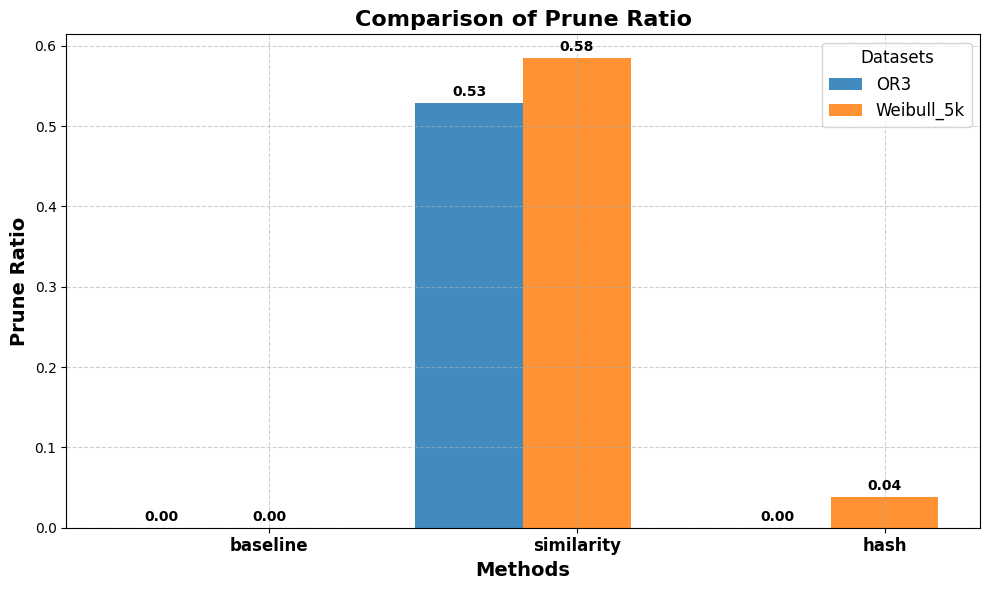

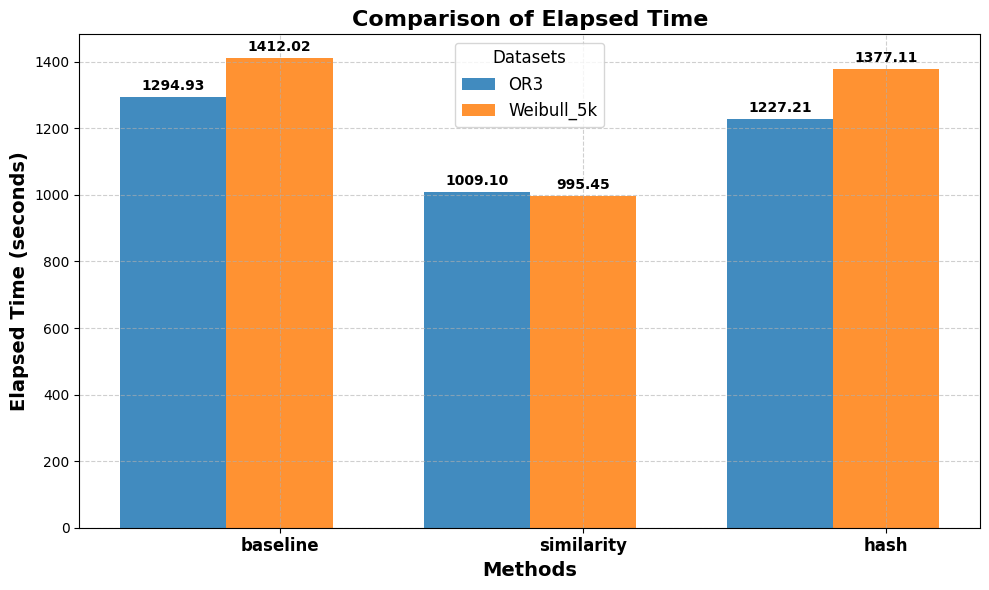

In [47]:
# Plot comparison graphs
plot_comparison_histogram(results, "prune_ratio", "Comparison of Prune Ratio", "Prune Ratio")
plot_comparison_histogram(results, "elapsed_time", "Comparison of Elapsed Time", "Elapsed Time (seconds)")
